In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['date'] = df['InvoiceDate'].dt.date
df['date'] = pd.to_datetime(df['date'])
df['heure'] = pd.to_datetime(df['InvoiceDate']).dt.hour
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['dow'] = df['date'].dt.dayofweek

In [5]:
print(len(df[df['UnitPrice']<0]))

2


In [6]:
df['UnitPrice'] = df['UnitPrice'].abs()

In [7]:
print(len(df[df['Quantity']<0])/len(df))

0.019604767590130447


on supprime les valeurs negatif de quantité parcequ'ils represente 0.01% de la population
on aurai pu les mettre en valeurs abs mais ca serait deformer les information. 

In [8]:
df['PT'] = df['UnitPrice'] * df['Quantity']

In [9]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,heure,month,dow,PT
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,8,12,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,12,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,8,12,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,12,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,12,2,20.34


In [10]:
df.rename(columns={
    'UnitPrice': 'PU',
    'CustomerID': 'ID',
    'Quantity': 'Quantite',
    'Country': 'Ville',
    'StockCode': 'Stockcode',
    'InvoiceNo': 'No'
}, inplace=True)
df.drop(['InvoiceDate'], axis = 1, inplace = True)
print(df.columns)

Index(['No', 'Stockcode', 'Description', 'Quantite', 'PU', 'ID', 'Ville',
       'date', 'heure', 'month', 'dow', 'PT'],
      dtype='object')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   No           541909 non-null  object        
 1   Stockcode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantite     541909 non-null  int64         
 4   PU           541909 non-null  float64       
 5   ID           406829 non-null  float64       
 6   Ville        541909 non-null  object        
 7   date         541909 non-null  datetime64[ns]
 8   heure        541909 non-null  int32         
 9   month        541909 non-null  int32         
 10  dow          541909 non-null  int32         
 11  PT           541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(4)
memory usage: 43.4+ MB


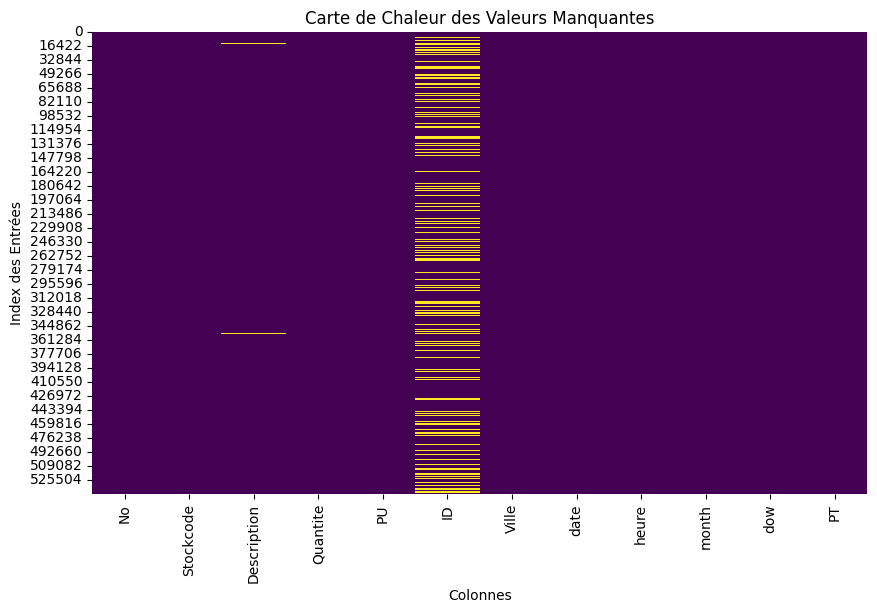

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte de Chaleur des Valeurs Manquantes')
plt.xlabel('Colonnes')
plt.ylabel('Index des Entrées')
plt.show()

In [13]:
#Supprimons df['ID'], car il contient beaucoup de valeurs manquante, et No peut jouer son role sans probleme
df.drop(['ID'], axis = 1, inplace = True)

In [14]:
df.isna().sum()

No                0
Stockcode         0
Description    1454
Quantite          0
PU                0
Ville             0
date              0
heure             0
month             0
dow               0
PT                0
dtype: int64

In [15]:
print((df.isna().sum().sum()/len(df))*100)

0.2683107311375157


In [16]:
df.dropna(inplace = True)
print(df.isna().sum().sum())

0


In [17]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
print(df.duplicated().sum())

5269
0


In [18]:
continent_map = {
    'United Kingdom': 'Europe', 'France': 'Europe', 'Netherlands': 'Europe',
    'Germany': 'Europe', 'Norway': 'Europe', 'EIRE': 'Europe', 'Switzerland': 'Europe',
    'Spain': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe', 'Italy': 'Europe',
    'Belgium': 'Europe', 'Lithuania': 'Europe', 'Iceland': 'Europe',
    'Channel Islands': 'Europe', 'Denmark': 'Europe', 'Cyprus': 'Europe',
    'Sweden': 'Europe', 'Austria': 'Europe', 'Finland': 'Europe',
    'Greece': 'Europe', 'Czech Republic': 'Europe', 'Malta': 'Europe', 'European Community': 'Europe',

    'Japan': 'Asia', 'Israel': 'Asia', 'Bahrain': 'Asia', 'Hong Kong': 'Asia',
    'Singapore': 'Asia', 'Lebanon': 'Asia', 'United Arab Emirates': 'Asia',
    'Saudi Arabia': 'Asia',

    'Canada': 'America', 'Brazil': 'America', 'USA': 'America',

    'Australia': 'Oceania',

    'RSA': 'Africa',

    # Autres
    'Unspecified': 'Unknown'
}


df['Continent'] = df['Ville'].map(continent_map)


In [19]:
df.head(5)

,No,Stockcode,Description,Quantite,PU,Ville,date,heure,month,dow,PT,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01,8,12,2,15.30,Europe
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01,8,12,2,20.34,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01,8,12,2,22.00,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12-01,8,12,2,20.34,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12-01,8,12,2,20.34,Europe


In [20]:
df['Continent'].value_counts()

Continent
Europe     531647
Asia         1307
Oceania      1258
America       474
Unknown       442
Africa         58
Name: count, dtype: int64

In [21]:
df_clean = df.copy()

In [22]:
# = pd.read_csv('df_clean.csv')
df_clean.head()

,No,Stockcode,Description,Quantite,PU,Ville,date,heure,month,dow,PT,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01,8,12,2,15.30,Europe
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01,8,12,2,20.34,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01,8,12,2,22.00,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12-01,8,12,2,20.34,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12-01,8,12,2,20.34,Europe


In [23]:
df.describe()

,Quantite,PU,date,heure,month,dow,PT
count,535186.000000,535186.000000,535186,535186.000000,535186.000000,535186.000000,535186.000000
mean,9.671608,4.727925,2011-07-03 22:08:57.888509440,13.076015,7.548394,2.424333,18.255805
min,-80995.000000,0.000000,2010-12-01 00:00:00,6.000000,1.000000,0.000000,-168469.600000
25%,1.000000,1.250000,2011-03-28 00:00:00,11.000000,5.000000,1.000000,3.750000
50%,3.000000,2.080000,2011-07-19 00:00:00,13.000000,8.000000,2.000000,9.900000
75%,10.000000,4.130000,2011-10-19 00:00:00,15.000000,11.000000,4.000000,17.400000
max,80995.000000,38970.000000,2011-12-09 00:00:00,20.000000,12.000000,6.000000,168469.600000
std,219.059260,97.360921,NaN,2.447461,3.508453,1.841000,381.168229


In [24]:
import plotly.express as px

In [25]:
daily_users = df_clean.groupby('date')['No'].nunique().reset_index()

fig = px.line(daily_users,
              x="date",
              y="No",
              title="Clients Journaliers",
              markers=True)

fig.update_layout(xaxis_title="Date",
                  yaxis_title="Nombres de clients",
                  template="plotly_dark",  # tu peux changer selon ton thème
                  height=500,width=900)
fig.show()

In [26]:
dow_users = df_clean.groupby('dow')['No'].nunique().reset_index()

fig = px.line(dow_users,
              x="dow",
              y="No",
              title="Nbres Clients Journaliers",
              markers=True)

fig.update_layout(xaxis_title="Jours de la semaine",
                  yaxis_title="Nombres de clients",
                  template="plotly_dark",  # tu peux changer selon ton thème
                  height=500,width=900)
fig.show()

In [27]:
dow_users = df_clean.groupby('month')['No'].nunique().reset_index()

fig = px.line(dow_users,
              x="month",
              y="No",
              title="Nbres de clients mensuel",
              markers=True)

fig.update_layout(xaxis_title="Mois de la semaine",
                  yaxis_title="Nombres de clients",
                  template="plotly_dark",  # tu peux changer selon ton thème
                  height=500,width=900)
fig.show()

In [28]:
cts = df_clean.groupby('Continent')['PT'].mean().reset_index()

fig = px.bar(
    cts,
    x="Continent",
    y="PT",
    text="PT",
    orientation="v",
    title="Dépense totale moyenne par continent",
    color="Continent",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(texttemplate='%{text:.1f}', textposition="outside")
fig.update_layout(
    xaxis_title="Continent",
    yaxis_title="Dépense totale moyenne",
    template="plotly_dark",  
    height=500,
    width=900,
    showlegend=False
)

fig.show()


In [29]:
var_cat = ['Ville', 'Continent']
var_num = ['Quantite', 'PU', 'PT']

In [30]:
print(df_clean['Continent'].value_counts())
print(df_clean['Ville'].value_counts(normalize = True))

Continent
Europe     531647
Asia         1307
Oceania      1258
America       474
Unknown       442
Africa         58
Name: count, dtype: int64
Ville
United Kingdom          0.913411
Germany                 0.017713
France                  0.015959
EIRE                    0.015292
Spain                   0.004724
Netherlands             0.004430
Belgium                 0.003866
Switzerland             0.003726
Portugal                0.002821
Australia               0.002351
Norway                  0.002029
Italy                   0.001500
Channel Islands         0.001414
Finland                 0.001299
Cyprus                  0.001142
Sweden                  0.000861
Unspecified             0.000826
Austria                 0.000749
Denmark                 0.000727
Japan                   0.000669
Poland                  0.000637
Israel                  0.000549
USA                     0.000544
Hong Kong               0.000531
Singapore               0.000428
Iceland                 0

La boutique de ce compte e commerce a 93% de ses clients dans les pays europeens majoritairement en United Kingdom (91%), les pays comme l'allemangne , la france, et l'EIRE, ont entre 1,8 et 1,5 % des clients. Tout les autres clients sont dans les autres pays et represente moins de 0,5 % de la clientelles actueeles.  

In [31]:
counts = df_clean.groupby('Continent')['PT'].mean().sort_values(ascending = False).reset_index()
counts.columns = ['Continent', 'Count']
fig = px.bar(counts, x = 'Count', y = 'Continent',
             color = 'Continent',
             orientation = 'h',
             title = 'Répartition des achats total moyen par continent'
             #color_discrete_map=class_color
            )
fig.update_layout(template='plotly_dark')
fig.show()

Remarque: L'ocanie, l'asie, et l'organization sont les contient qui ont fait le plus d'achat sur la plateforme

### SEGMENTATION

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [33]:
df_clean = df_clean[df_clean["Continent"] != 'Africa']

In [34]:
from sklearn.model_selection import train_test_split
df_clean, _ = train_test_split(df_clean, train_size = 20000, random_state = 42, stratify = df_clean['Continent'])

In [35]:
df_train, df_test = train_test_split(df_clean, train_size = 10000, random_state = 42, stratify = df_clean['Continent'])

In [36]:
df_train.head()

,No,Stockcode,Description,Quantite,PU,Ville,date,heure,month,dow,PT,Continent
142602,548617,20992,JAZZ HEARTS PURSE NOTEBOOK,12,0.85,United Kingdom,2011-04-01,11,4,4,10.20,Europe
538859,581419,22970,LONDON BUS COFFEE MUG,18,2.55,United Kingdom,2011-12-08,15,12,3,45.90,Europe
30599,538877,21327,SKULLS WRITING SET,1,3.36,United Kingdom,2010-12-14,15,12,1,3.36,Europe
28374,538636,21843,RED RETROSPOT CAKE STAND,1,10.95,United Kingdom,2010-12-13,13,12,0,10.95,Europe
112168,545872,21445,12 PINK ROSE PEG PLACE SETTINGS,2,1.25,United Kingdom,2011-03-07,14,3,0,2.50,Europe


In [37]:
df_train_km = df_train[['month', 'dow', 'PT']]
df_test_km = df_test[['month', 'dow', 'PT']]

In [38]:
df_train_km.head(2)

,month,dow,PT
142602,4,4,10.2
538859,12,3,45.9


In [39]:
scaler = StandardScaler()
df_train_km = scaler.fit_transform(df_train_km)
df_test_km = scaler.transform(df_test_km)

### ACP non Lineaire (Sans reduction de dimensionnalité)

In [40]:
kpca = KernelPCA(n_components=2, kernel='rbf')

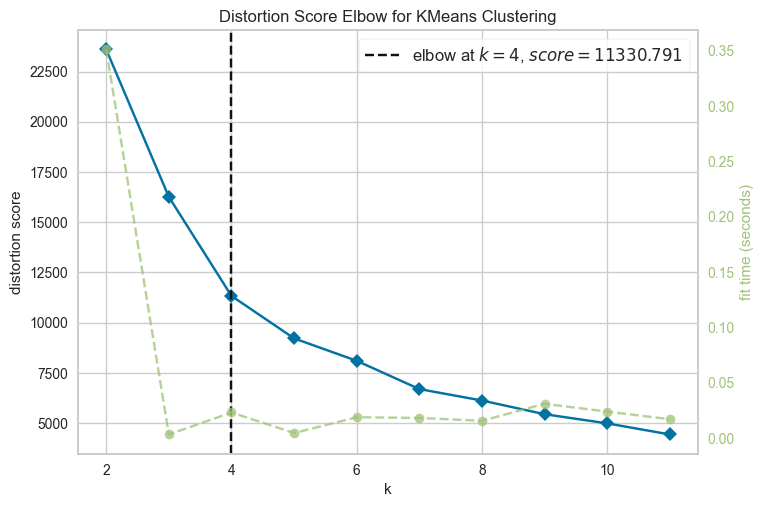

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
kmeans = KMeans(random_state = 42)
visualiser = KElbowVisualizer(kmeans, k = (2, 12))
visualiser.fit(df_train_km)
visualiser.show()

In [42]:
df_train_km = kpca.fit_transform(df_train_km)
df_test_km  = kpca.transform(df_test_km)   


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_train_km)

clusters_train = kmeans.predict(df_train_km)   
clusters_test  = kmeans.predict(df_test_km)    


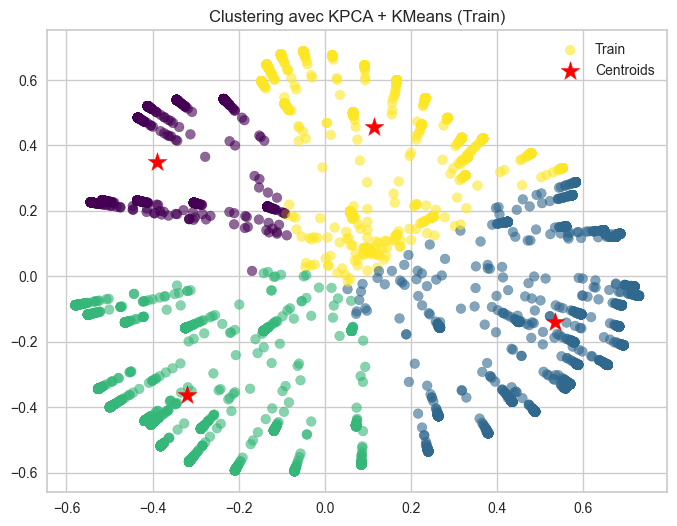

In [43]:
# Visualisation
plt.figure(figsize=(8,6))

# Trainset
plt.scatter(df_train_km[:,0], df_train_km[:,1], 
            c=clusters_train, cmap="viridis", alpha=0.6, label="Train")
            
# Centroïdes
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c="red", marker="*", s=200, label="Centroids")

plt.legend()
plt.title("Clustering avec KPCA + KMeans (Train)")
plt.show()


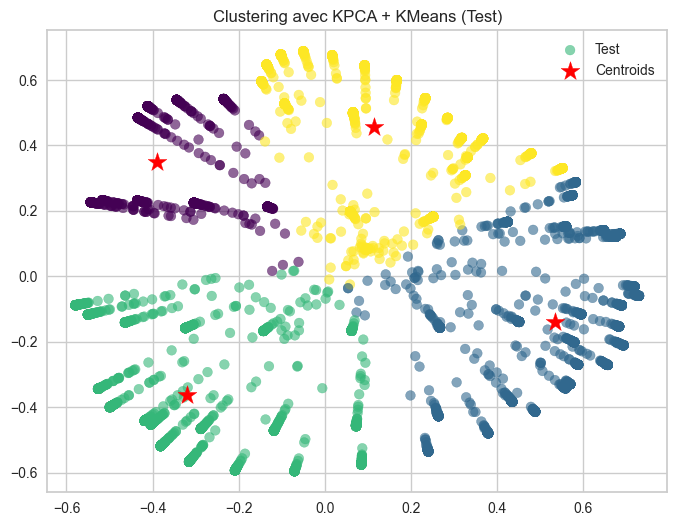

In [44]:
# Visualisation
plt.figure(figsize=(8,6))

# Testset
plt.scatter(df_test_km[:,0], df_test_km[:,1], 
            c=clusters_test, cmap="viridis", alpha=0.6, label="Test")
            
# Centroïdes
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c="red", marker="*", s=200, label="Centroids")

plt.legend()
plt.title("Clustering avec KPCA + KMeans (Test)")
plt.show()


In [45]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_train_km, clusters_train)
print("Silhouette Score :", score)

Silhouette Score : 0.4779975923973382


In [46]:
df_train['clusters'] = clusters_train
df_test['clusters'] = clusters_test
data_clusters = pd.concat([df_train, df_test])
df_train.to_csv('data_clusters.csv', index = 0)

In [47]:
df = df_train.copy()

In [48]:
df.columns

Index(['No', 'Stockcode', 'Description', 'Quantite', 'PU', 'Ville', 'date',
       'heure', 'month', 'dow', 'PT', 'Continent', 'clusters'],
      dtype='object')

## NLP

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [50]:
stop_words = set(stopwords.words('english'))

In [51]:
def processing_text(text):
    text = text.lower()
    text = text.translate(str.maketrans(" ", " ", string.punctuation))
    tokens = word_tokenize(text)
    tokens = [mot for mot in tokens if mot not in stop_words]
    return " ".join(tokens)

In [52]:
df["Description_clean"] = df["Description"].apply(processing_text)
#print(df)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Description_clean"])

print("Vocabulaire :", vectorizer.get_feature_names_out())
print("Nombre de mot unique :", len(vectorizer.get_feature_names_out()))
#print("Matrice TF-IDF :\n", X.toarray())

Vocabulaire : ['10' '11' '12' ... 'youre' 'yuletide' 'zinc']
Nombre de mot unique : 1661



📊 Cluster 0
🔝 Top 10 mots :
set: 235
bag: 151
christmas: 141
vintage: 139
red: 133
heart: 129
retrospot: 116
design: 100
pink: 78
cake: 73


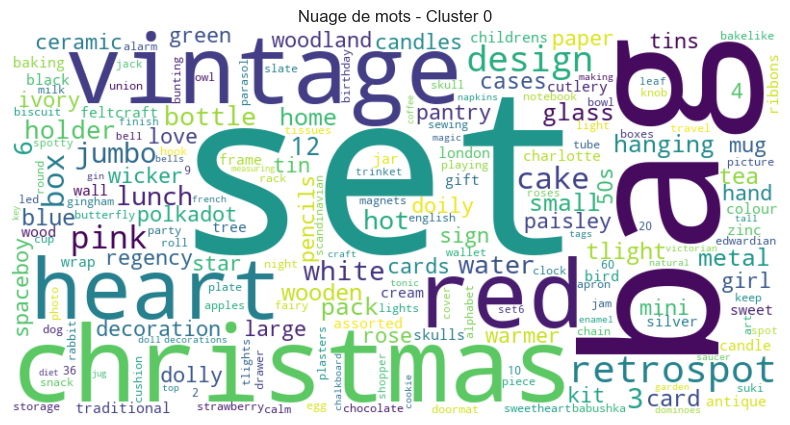


📊 Cluster 1
🔝 Top 10 mots :
bag: 295
retrospot: 254
red: 246
set: 218
pink: 205
heart: 199
design: 154
blue: 128
cake: 127
white: 126


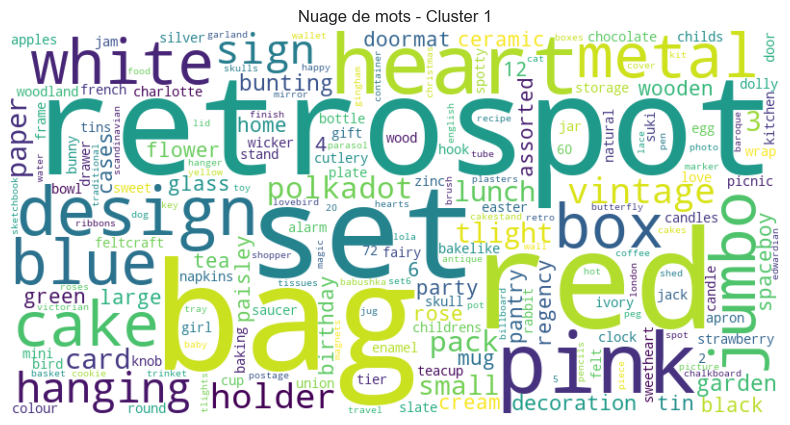


📊 Cluster 2
🔝 Top 10 mots :
set: 347
bag: 289
christmas: 260
heart: 250
red: 246
vintage: 225
retrospot: 203
design: 180
box: 153
pink: 148


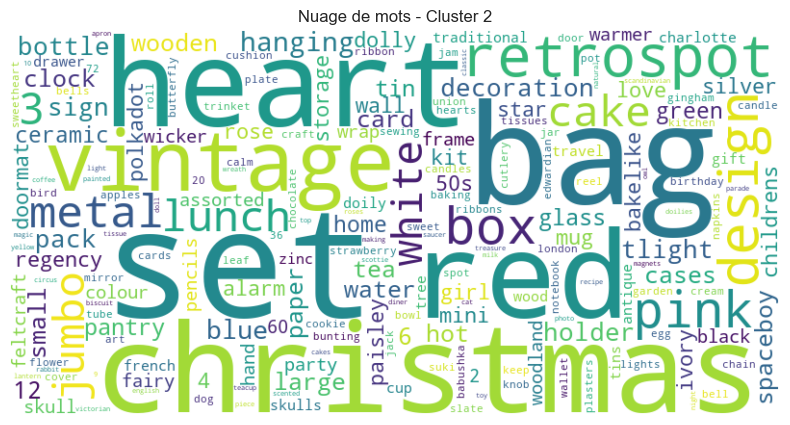


📊 Cluster 3
🔝 Top 10 mots :
bag: 225
set: 202
red: 168
heart: 145
retrospot: 138
pink: 116
vintage: 115
design: 115
jumbo: 102
box: 93


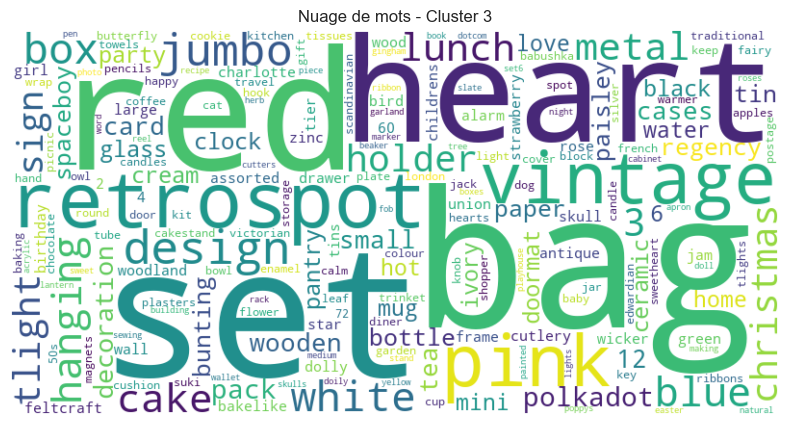

In [53]:
from collections import Counter
from wordcloud import WordCloud
for cluster in sorted(df['clusters'].unique()):
    print(f"\n📊 Cluster {cluster}")
    
    # Regrouper toutes les descriptions propres du cluster
    descriptions = df[df['clusters'] == cluster]['Description_clean']
    text = " ".join(descriptions)
    
    # Compter les mots
    words = text.split()
    word_counts = Counter(words)
    
    # Top 10 mots du cluster
    print("🔝 Top 10 mots :")
    for word, count in word_counts.most_common(10):
        print(f"{word}: {count}")
    
    # --- 4. Générer un nuage de mots ---
    wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis').generate_from_frequencies(word_counts)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuage de mots - Cluster {cluster}")
    plt.show()

In [54]:
cluster_counts = df['clusters'].value_counts(normalize=True).reset_index()
cluster_counts.columns = ['Cluster', 'Proportion']
fig = px.pie(
    cluster_counts,
    values='Proportion',
    names='Cluster',
    title="Répartition des observations par cluster ",
    hole=0.3,  
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_traces(
    textinfo="percent+label",
    textposition="inside"
)

fig.update_layout(
    showlegend=True,
    template="plotly_dark"
)

fig.show()


In [55]:
df['Continent'].value_counts(normalize = True)

Continent
Europe     0.9935
Oceania    0.0024
Asia       0.0024
America    0.0009
Unknown    0.0008
Name: proportion, dtype: float64

In [56]:
ct = pd.crosstab(df['Continent'], df['clusters'], normalize='index') * 100
continent_order = df['Continent'].value_counts().index
ct = ct.loc[continent_order]

ct_long = ct.reset_index().melt(id_vars='Continent', var_name='Cluster', value_name='Pourcentage')

fig = px.bar(
    ct_long,
    x="Pourcentage",
    y="Continent",
    color="Cluster",
    orientation="h",
    title="Répartition des clusters par continent (%)",
    text="Pourcentage",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition="inside")
fig.update_layout(
    barmode="stack", 
    xaxis_title="Pourcentage (%)",
    yaxis_title="Continent",
    template="plotly_white"
)

fig.show()

In [57]:
cts = df.groupby('Continent')['PT'].mean().reset_index()

fig = px.bar(
    cts,
    x="Continent",
    y="PT",
    text="PT",
    orientation="v",
    title="Dépense totale moyenne par continent",
    color="Continent",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(texttemplate='%{text:.1f}', textposition="outside")
fig.update_layout(
    xaxis_title="Continent",
    yaxis_title="Dépense totale moyenne",
    template="plotly_dark",  
    height=500,
    width=900,
    showlegend=False
)

fig.show()


In [58]:
cts = df.groupby('clusters')['PT'].mean().reset_index()

fig = px.pie(cts, 
             names='clusters', 
             values='PT', 
             title="Dépense totale moyenne par clusters",
             color='clusters',      
             template="plotly_dark",
             hole=0.3)              

fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

In [59]:
df['month'] = df['month'].astype(int)
ct = pd.crosstab(df['month'], df['clusters'], normalize='index') * 100
ct = ct.sort_index()  

ct_long = ct.reset_index().melt(id_vars='month', var_name='Cluster', value_name='Pourcentage')

fig = px.bar(
    ct_long,
    x="Pourcentage",
    y="month",
    color="Cluster",
    orientation="h",
    title="Répartition des clusters par mois (%)",
    text="Pourcentage",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition="inside")
fig.update_layout(
    barmode="stack",   
    xaxis_title="Pourcentage (%)",
    yaxis_title="Mois",
    template="plotly_white",
    yaxis=dict(dtick=1)  
)

fig.show()


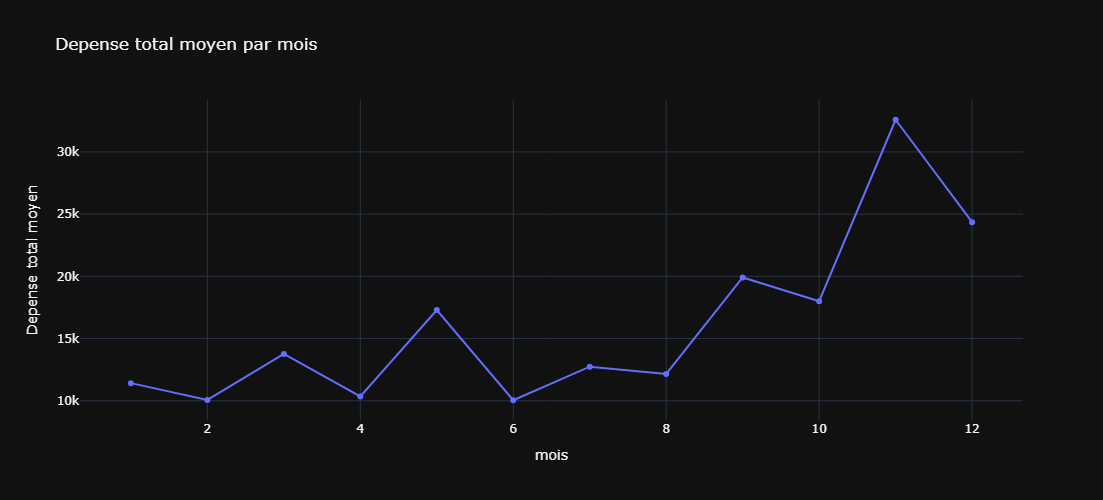

In [60]:
cts = df.groupby('month')['PT'].sum().reset_index()

fig = px.line(cts,
              x="month",
              y="PT",
              title="Depense total moyen par mois",
              markers=True)

fig.update_layout(xaxis_title="mois",
                  yaxis_title="Depense total moyen",
                  template="plotly_dark",  
                  height=500,width=900)
fig.show()

In [61]:
month_users = df.groupby('month')['No'].nunique().reset_index()

fig = px.line(month_users,
              x="month",
              y="No",
              title="Nbres de clients mensuel",
              markers=True)

fig.update_layout(xaxis_title="Mois de l'année",
                  yaxis_title="Nombres de clients",
                  template="plotly_dark",  
                  height=500,width=900)
fig.show()

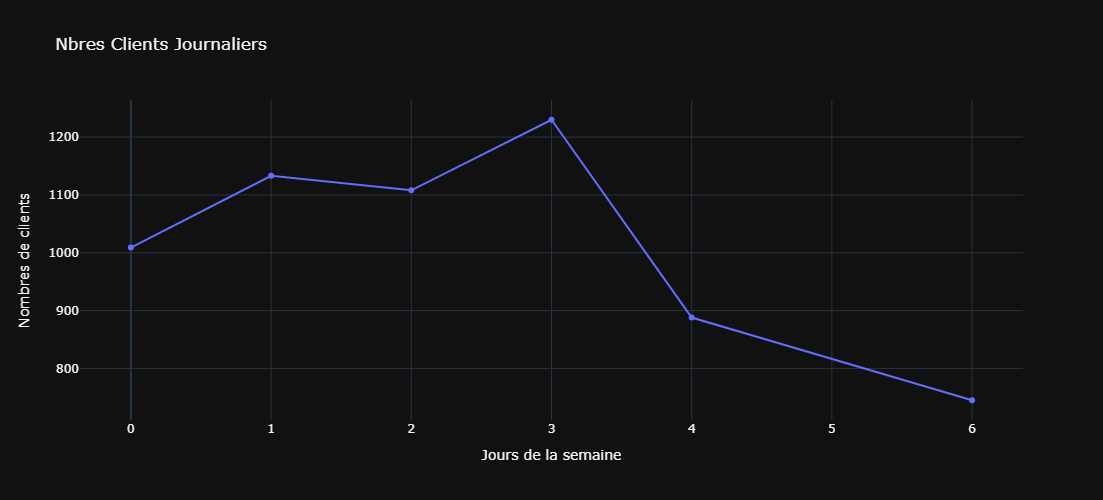

In [62]:
dow_users = df.groupby('dow')['No'].nunique().reset_index()

fig = px.line(dow_users,
              x="dow",
              y="No",
              title="Nbres Clients Journaliers",
              markers=True)

fig.update_layout(xaxis_title="Jours de la semaine",
                  yaxis_title="Nombres de clients",
                  template="plotly_dark",  
                  height=500,width=900)
fig.show()

In [63]:
hour_users = df.groupby('heure')['No'].nunique().reset_index()

fig = px.line(hour_users,
              x="heure",
              y="No",
              title="Nbres de clients par heures",
              markers=True)

fig.update_layout(xaxis_title="Heure de la journée",
                  yaxis_title="Nombres de clients",
                  template="plotly_dark",  
                  height=500,width=900)
fig.show()

In [64]:
df.head(1)

,No,Stockcode,Description,Quantite,PU,Ville,date,heure,month,dow,PT,Continent,clusters,Description_clean
142602,548617,20992,JAZZ HEARTS PURSE NOTEBOOK,12,0.85,United Kingdom,2011-04-01,11,4,4,10.2,Europe,3,jazz hearts purse notebook


In [65]:
df.columns

Index(['No', 'Stockcode', 'Description', 'Quantite', 'PU', 'Ville', 'date',
       'heure', 'month', 'dow', 'PT', 'Continent', 'clusters',
       'Description_clean'],
      dtype='object')

In [66]:
df['date'] = pd.to_datetime(df['date'])

In [67]:
rfm = df.groupby('No').agg({
    'date': lambda x: (df['date'].max() - x.max()).days,  
    'No': 'count',                                       
    'PT': 'mean'                                          
})
rfm.rename(columns={'date':'Recency','No':'Frequency','PT':'Monetary'}, inplace=True)

In [68]:
cluster_rfm = rfm.merge(df[['No','clusters']], on='No') \
                 .groupby('clusters')[['Recency','Frequency','Monetary']].mean().reset_index()

In [69]:
cluster_rfm.head()

,clusters,Recency,Frequency,Monetary
0,0,97.567806,4.119074,14.211435
1,1,258.113355,2.584485,16.263626
2,2,101.822777,3.632765,15.421891
3,3,161.244348,2.197210,33.841256


| *Cluster* | *Profil Client* | *Stratégie Marketing* |
|-------------|------------------|--------------------------|
| *0* | Clients *récents* (Recency faible), *très actifs* (Frequency élevée), mais avec un *panier moyen modéré. Ce sont des acheteurs réguliers et fidèles. | Fidéliser avec un **programme de fidélité* (réductions cumulées, points, cadeaux), et proposer des ventes croisées (cross-selling) pour augmenter le panier moyen. |
| *1* | Clients *peu récents* (longtemps inactifs), avec une *fréquence faible, mais un **panier moyen correct. Ce sont des clients à risque de **churn. | Relancer avec des **campagnes de réactivation* (emails personnalisés, offres exclusives, codes promo). Mettre en avant la *nouveauté* et les produits tendances pour susciter leur retour. |
| *2* | Clients *récents, avec une **fréquence moyenne* et un *panier légèrement supérieur à la moyenne. Ils sont actifs mais pas encore pleinement fidèles. | Encourager la **récurrence d’achat* avec des *ventes flash* ou des *abonnements*. Créer une expérience personnalisée (recommandations basées sur achats passés). |
| *3* | Clients *intermédiaires en récence* (ni très récents ni trop anciens), avec une *faible fréquence, mais un **panier très élevé. Ce sont des **gros dépensiers occasionnels. | Mettre en place une **stratégie premium/VIP* (accès anticipé aux nouveautés, service personnalisé). Offrir des avantages exclusifs pour les inciter à acheter plus souvent. |

In [70]:
cluster_rfm.to_csv('RFM.csv', index = False)

In [71]:
import joblib

joblib.dump(value = kmeans, filename = 'cluster_model.pkl')

['cluster_model.pkl']

## CLASSIFICATION

In [72]:
df_train.columns

Index(['No', 'Stockcode', 'Description', 'Quantite', 'PU', 'Ville', 'date',
       'heure', 'month', 'dow', 'PT', 'Continent', 'clusters'],
      dtype='object')

In [73]:
df_train.drop(["Description", "No", "Stockcode", "Ville", "date"], axis = 1, inplace = True)
df_test.drop(["Description", "No", "Stockcode", "Ville", "date"], axis = 1, inplace = True)


In [74]:
df_train["Continent"].replace({'Europe':0, 'Unknown':1, 'Oceania':2, 'Asia':3, 'America':4}, inplace = True)
df_test["Continent"].replace({'Europe':0, 'Unknown':1, 'Oceania':2, 'Asia':3, 'America':4}, inplace = True)

In [75]:
df_train.head()

,Quantite,PU,heure,month,dow,PT,Continent,clusters
142602,12,0.85,11,4,4,10.20,0,3
538859,18,2.55,15,12,3,45.90,0,0
30599,1,3.36,15,12,1,3.36,0,2
28374,1,10.95,13,12,0,10.95,0,2
112168,2,1.25,14,3,0,2.50,0,1


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.multiclass import OneVsRestClassifier
seed = 42

In [77]:
X_train = df_train.drop('clusters', axis = 1)
y_train = df_train['clusters']
X_test = df_test.drop('clusters', axis = 1)
y_test = df_test['clusters']

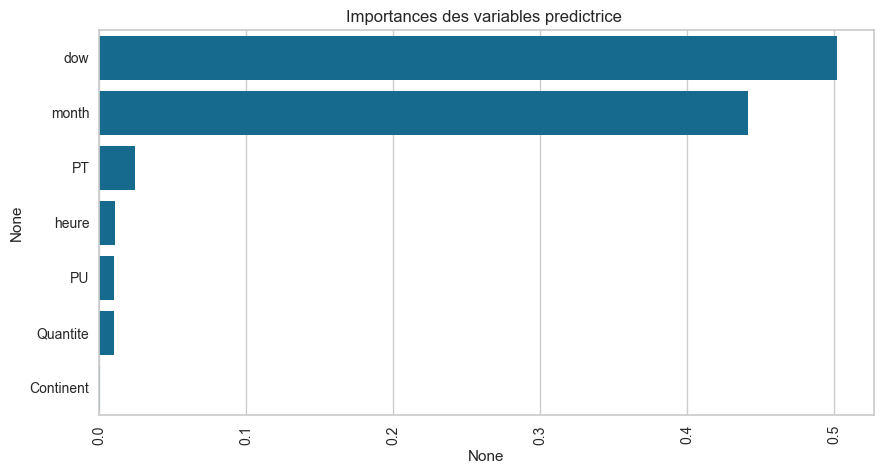

In [78]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = seed)
rfc.fit(X_train, y_train)
var_imp = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(x = var_imp, y = var_imp.index)
plt.xticks(rotation = 90)
plt.xlabel = ('Variables')
plt.ylabel = ('Score')
plt.title('Importances des variables predictrice ')
plt.show()

In [79]:
def evaluation(model, X_train, y_train):
    

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 5, 
                                                      scoring = 'f1_macro', train_sizes = np.linspace(0.1, 1,5), n_jobs=-1)
    plt.figure(figsize = (12, 8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'val_score')
    plt.show()

In [80]:
XGBClassifier = XGBClassifier(n_estimators = 10, random_state = seed)
AdaBoostClassifier = AdaBoostClassifier(n_estimators = 20, random_state = seed)
RandomForestClassifier = RandomForestClassifier(n_estimators = 20, random_state = seed)
DecisionTreeClassifier = DecisionTreeClassifier(random_state = seed)
LogisticRegression = LogisticRegression(random_state = seed)
KNeighborsClassifier = KNeighborsClassifier()
SVC = SVC(random_state = seed)

In [81]:
ovr_1 = OneVsRestClassifier(LogisticRegression)
ovr_2 = OneVsRestClassifier(KNeighborsClassifier)
ovr_3 = OneVsRestClassifier(SVC)


In [82]:
dicts_of_models = {'XGB':XGBClassifier, 
                   'AdaBoostClassifier':AdaBoostClassifier, 
                   'RandomForestClassifier':RandomForestClassifier, 
                   'DecisionTreeClassifier':DecisionTreeClassifier, 
                   'LogisticRegression':ovr_1,
                   'KNeighborsClassifier':ovr_2, 
                   #'SVC':ovr_3
                   }

XGB
[[1795    0    2    2]
 [   0 2826    3    3]
 [   0    0 3279    2]
 [   5    4    2 2077]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1799
           1       1.00      1.00      1.00      2832
           2       1.00      1.00      1.00      3281
           3       1.00      0.99      1.00      2088

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



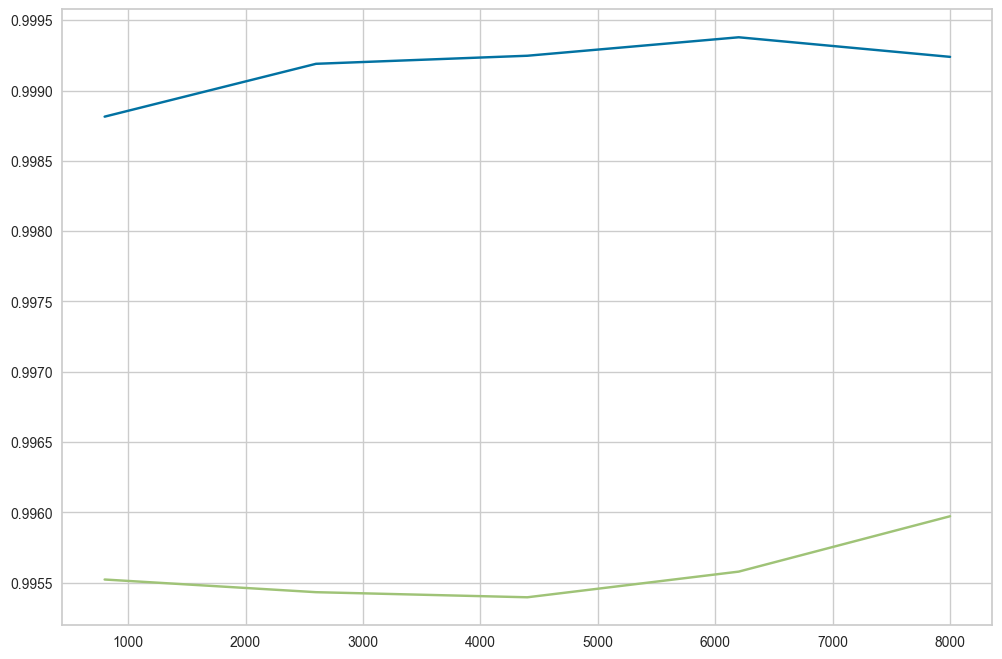

AdaBoostClassifier
[[ 552    0    3 1244]
 [   0   55    3 2774]
 [   0    0 3281    0]
 [ 156    0   12 1920]]
              precision    recall  f1-score   support

           0       0.78      0.31      0.44      1799
           1       1.00      0.02      0.04      2832
           2       0.99      1.00      1.00      3281
           3       0.32      0.92      0.48      2088

    accuracy                           0.58     10000
   macro avg       0.77      0.56      0.49     10000
weighted avg       0.82      0.58      0.52     10000



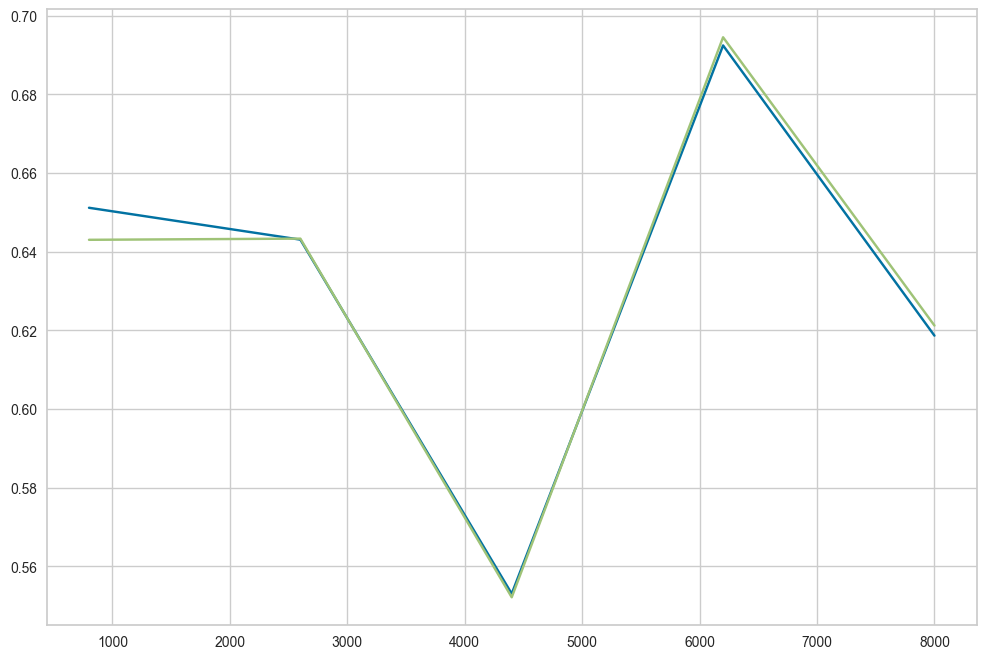

RandomForestClassifier
[[1796    0    2    1]
 [   0 2823    3    6]
 [   0    0 3280    1]
 [   8    3    1 2076]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1799
           1       1.00      1.00      1.00      2832
           2       1.00      1.00      1.00      3281
           3       1.00      0.99      1.00      2088

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



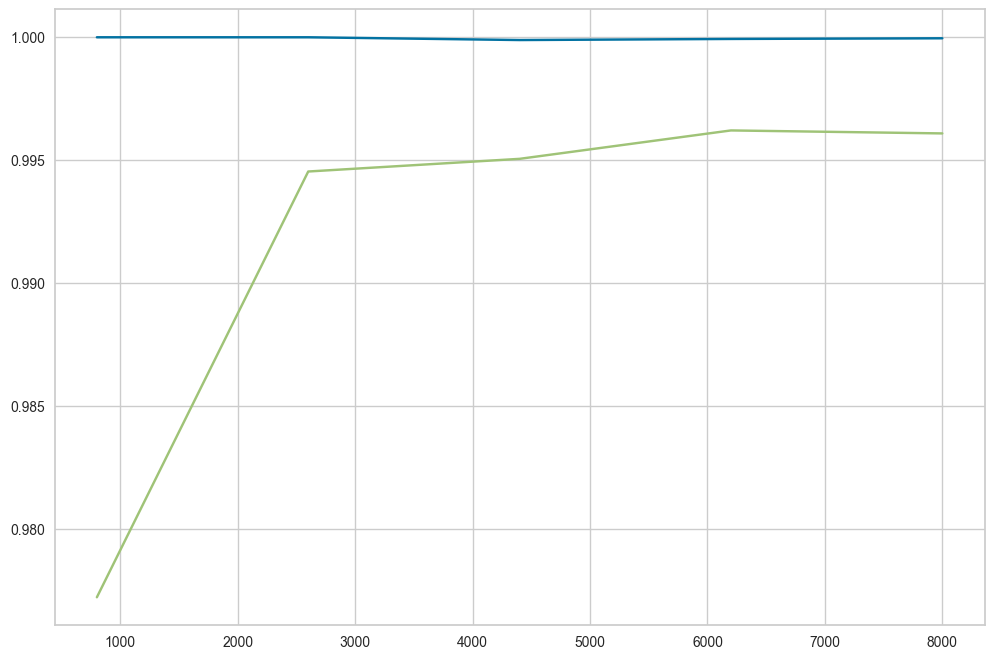

DecisionTreeClassifier
[[1793    0    1    5]
 [   0 2826    2    4]
 [   2    1 3276    2]
 [   3    5    1 2079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1799
           1       1.00      1.00      1.00      2832
           2       1.00      1.00      1.00      3281
           3       0.99      1.00      1.00      2088

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



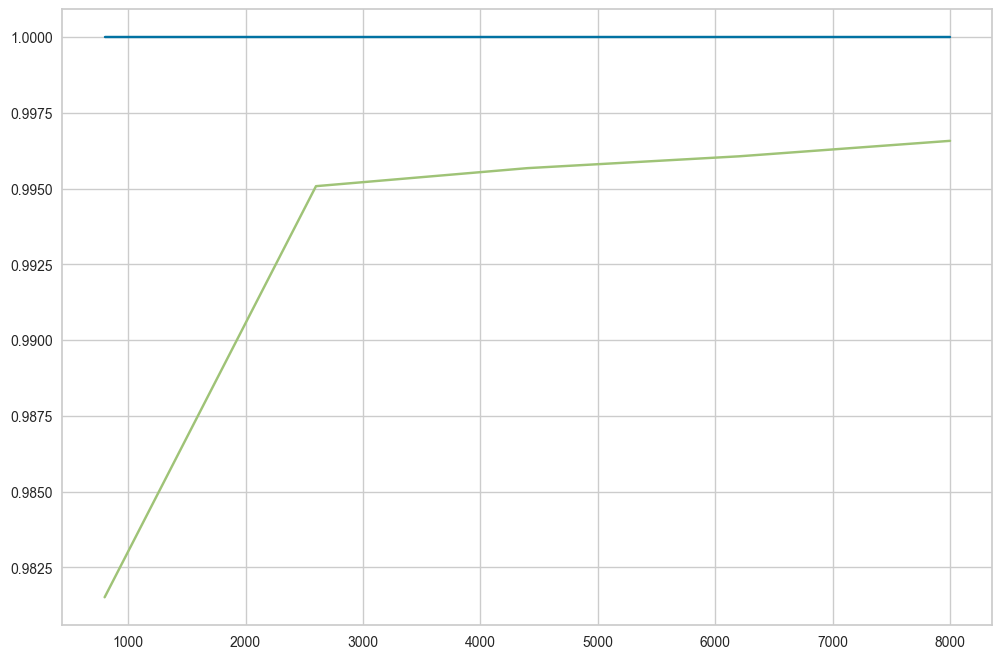

LogisticRegression
[[1342    0  238  219]
 [   1 2807    4   20]
 [   3    0 3277    1]
 [  16   59   14 1999]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      1799
           1       0.98      0.99      0.99      2832
           2       0.93      1.00      0.96      3281
           3       0.89      0.96      0.92      2088

    accuracy                           0.94     10000
   macro avg       0.95      0.92      0.93     10000
weighted avg       0.95      0.94      0.94     10000



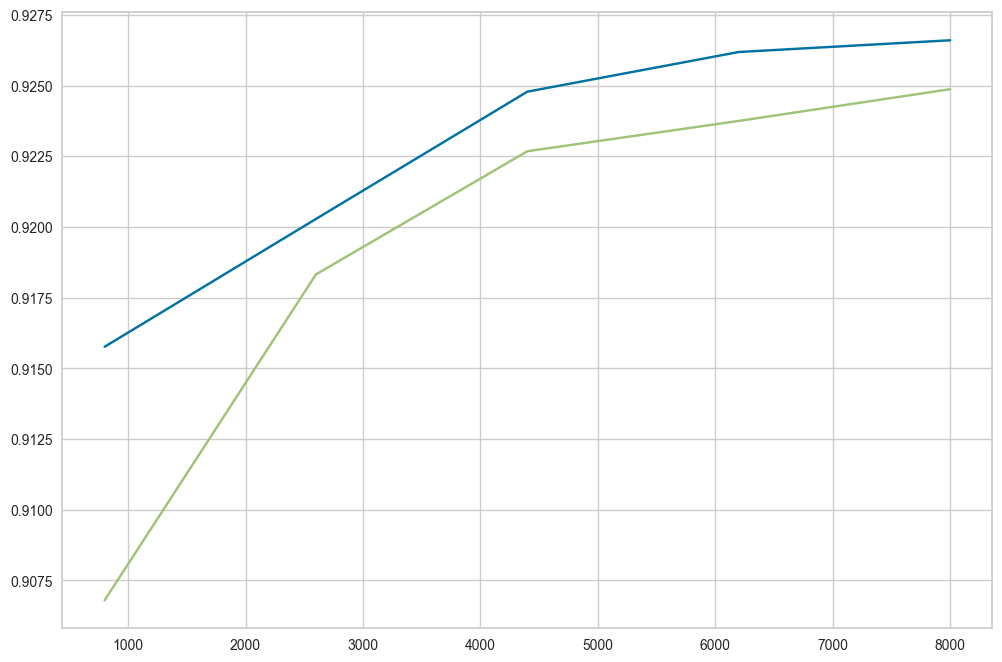

KNeighborsClassifier
[[1444   10  241  104]
 [   3 2584   98  147]
 [ 124   54 3046   57]
 [ 102  215   44 1727]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1799
           1       0.90      0.91      0.91      2832
           2       0.89      0.93      0.91      3281
           3       0.85      0.83      0.84      2088

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



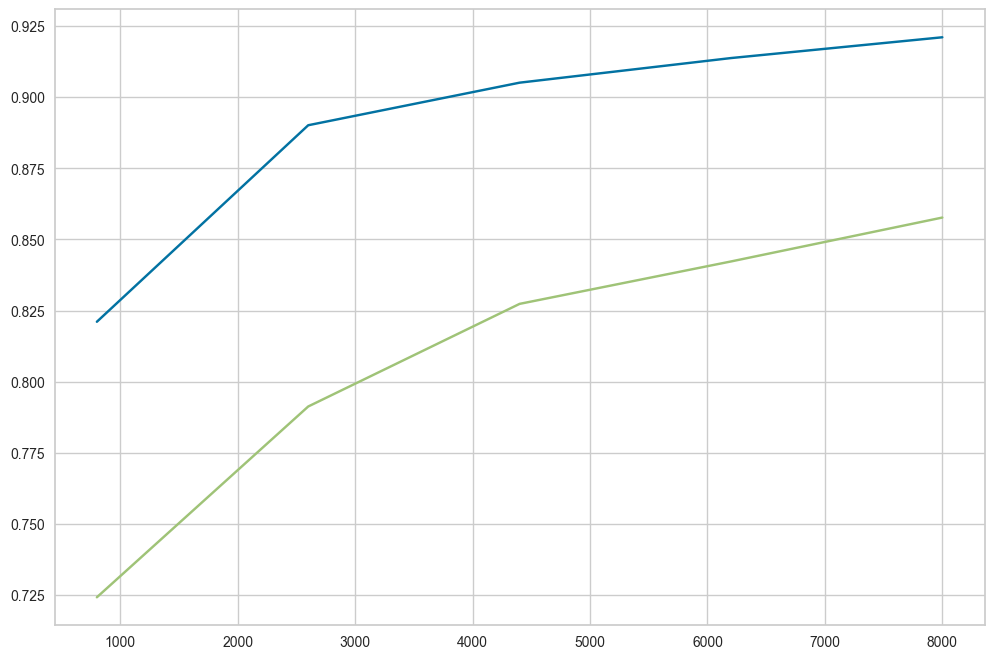

In [83]:
for name, model in dicts_of_models.items():
    print(name)
    evaluation(model, X_train, y_train)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [85]:
Lr = LogisticRegression(random_state = seed)
final_model = OneVsRestClassifier(Lr)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

In [86]:
import joblib

joblib.dump(value = final_model, filename = 'class_model.pkl')

['class_model.pkl']

In [87]:
model_loaded = joblib.load(filename = 'class_model.pkl')